## Ratingとおすすめの関係

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv("../data/raw/train.csv")
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count
0,0,25,3-season skirt!,"Adorable, well-made skirt! lined and very slim...",5,1,4
1,0,39,Very cute,Love the asymmetrical hem. waist fit snugly as...,5,1,0
2,0,42,Beautiful! fruns small for typical retailer si...,I love this skirt! i wasn't sure about the mix...,5,1,5
3,0,45,NaN,I was really pleased with this skirt. the ligh...,5,1,9
4,0,57,"Unique, pretty asymmetric skirt",I saw this skirt in retailer several months ag...,5,1,1


In [3]:
# ratingに対するlabelのカウント
count_0 = df[df["Recommended IND"] == 0]["Rating"].value_counts().sort_index()
count_1 = df[df["Recommended IND"] == 1]["Rating"].value_counts().sort_index()

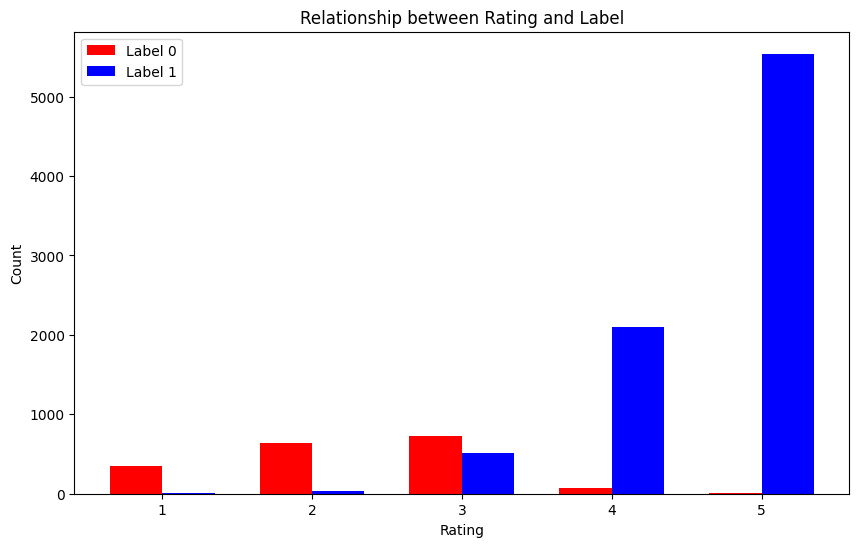

In [4]:
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(1, 6)

bar1 = ax.bar(index - bar_width/2, count_0, bar_width, label='Label 0', color='red')
bar2 = ax.bar(index + bar_width/2, count_1, bar_width, label='Label 1', color='blue')
ax.set_xlabel('Rating')
ax.set_ylabel('Count')
ax.set_title('Relationship between Rating and Label')
ax.set_xticks(index)
ax.set_xticklabels(index)
ax.legend()

## 埋め込みした結果と、正解ラベルが離れているデータを抽出する

In [5]:
df = pd.read_csv("../data/deberta/train.csv")

In [6]:
threshold = 0.5
pred = df["probability"].to_numpy().astype(np.float32)
labels = df["labels"].to_numpy().astype(np.float32)
differences = np.abs(pred - labels)
indices = np.where(differences > threshold)[0]

In [7]:
incorrect_df = df.iloc[indices]
incorrect_df.head(3)

,Clothing ID,Age,Positive Feedback Count,Division Name,Department Name,Class Name,text,labels,probability
8,1,30,0,General,Bottoms,Pants,title: Comfy but... [SEP] review: The top is h...,1,0.003810
14,2,25,4,General,Tops,Sweaters,"title: Love, love, but way too big! [SEP] revi...",1,0.005596
15,2,26,1,General,Tops,Sweaters,title: Looks good but for specific sizes [SEP]...,0,0.998502


In [8]:
incorrect_df.iloc[0]["text"]

'title: Comfy but... [SEP] review: The top is huge! i wear an xs and am not the bustiest of women, but the top part of this romper felt like it belonged on a medium or large, even though the bottoms and waist fit perfectly. i was really disappointed, as i loved it in every other way.'